In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [63]:
df

,User_ID,Cust_name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [4]:
df.shape

(11251, 15)

In [5]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [6]:
df.rename({'Age Group':'Age_Group'},axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age_Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age_Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [9]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(11239, 13)

In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
df.shape

(11239, 13)

In [14]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age_Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
df['Amount'] = df['Amount'].astype('int')

In [16]:
df['Amount'].dtypes

dtype('int32')

# EDA

# Gender

In [64]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


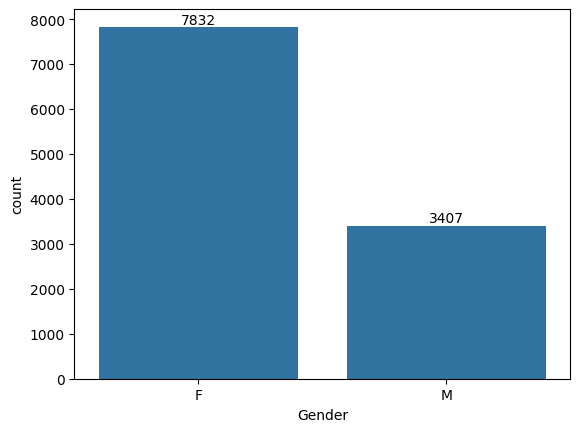

In [18]:
ax = sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

# Sum of total Amount by Gender

In [19]:
more_sales = df.groupby(["Gender"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [20]:
more_sales

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

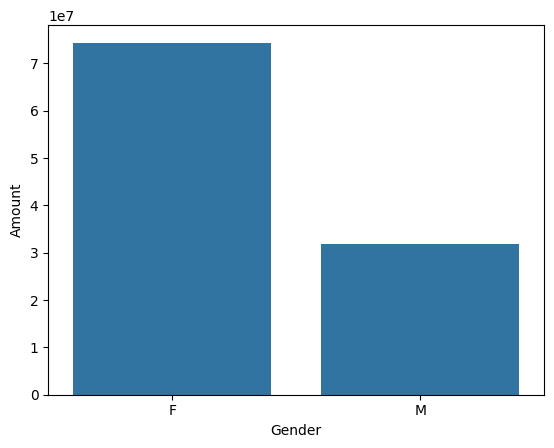

In [21]:
sns.barplot(x='Gender',y='Amount',data=more_sales)

# Age Group

In [22]:
df['Age_Group'].unique()

array(['26-35', '0-17', '18-25', '51-55', '46-50', '55+', '36-45'],
      dtype=object)

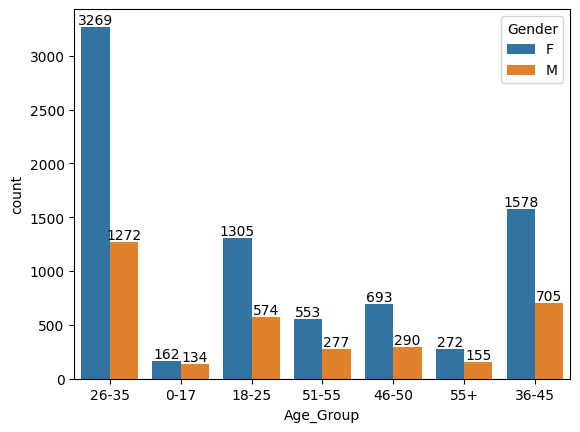

In [23]:
ax = sns.countplot(x='Age_Group',hue='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can see that most of the age group are between 26-35 yrs female

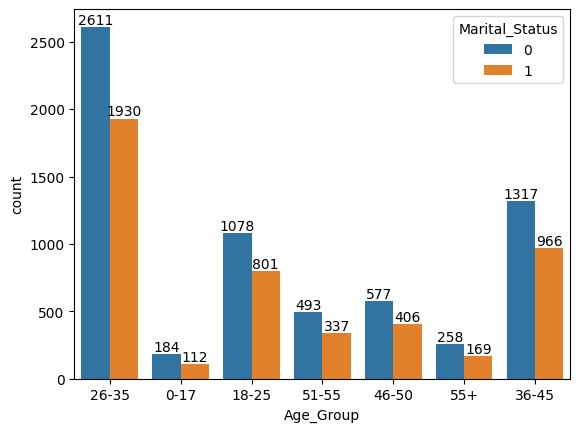

In [24]:
ax = sns.countplot(x='Age_Group',hue='Marital_Status',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

# Sum of total Amount by Age Group

In [25]:
sales_age  = df.groupby(['Age_Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [26]:
sales_age

,Age_Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age_Group', ylabel='Amount'>

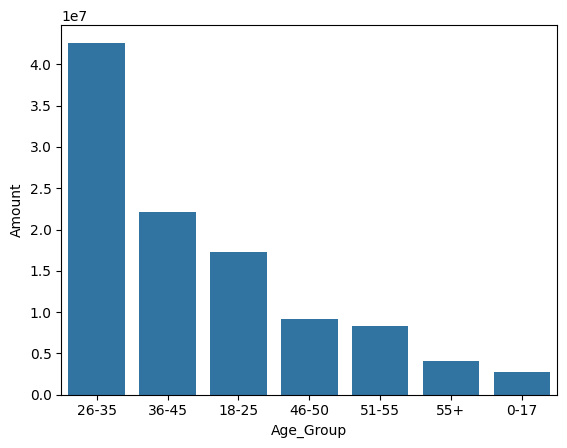

In [27]:
sns.barplot(x='Age_Group',y='Amount', data=sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

# State

In [28]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

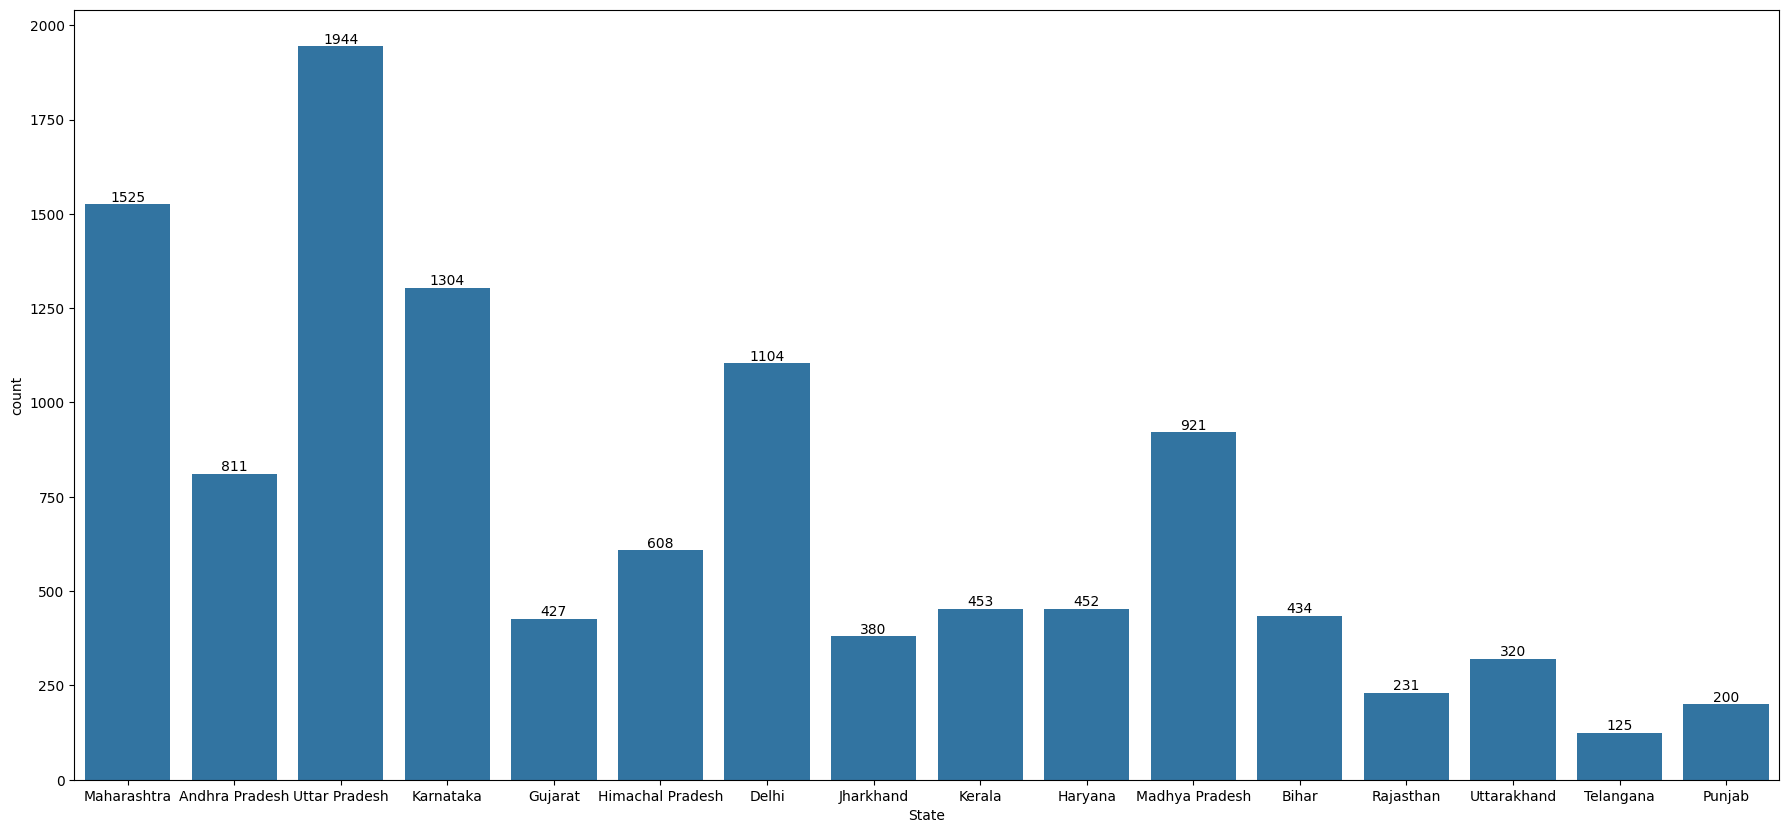

In [66]:
plt.figure(figsize=(22,10))
ax = sns.countplot(x='State',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [71]:
sales_order = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

In [72]:
sales_order

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


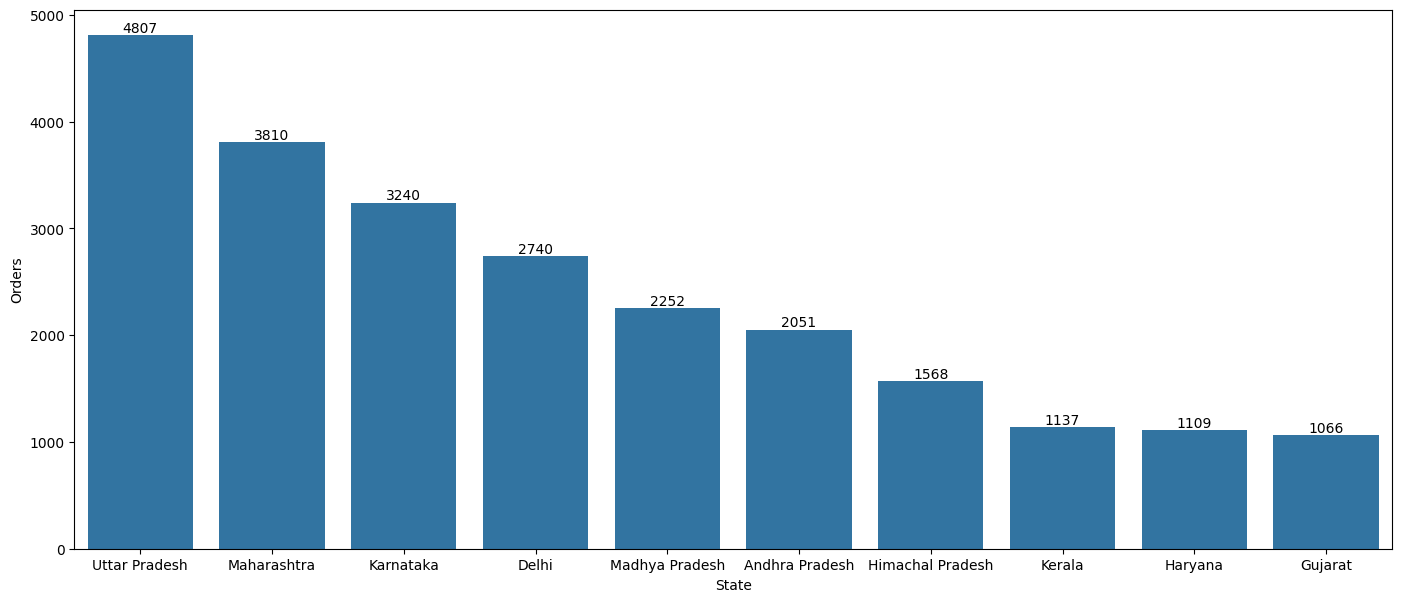

In [76]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x='State',y='Orders',data=sales_order)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

we can see that most of the orders are from Uttar Pradesh then 2nd is Maharashtra and 3rd one is Karnataka

In [77]:
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

In [78]:
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


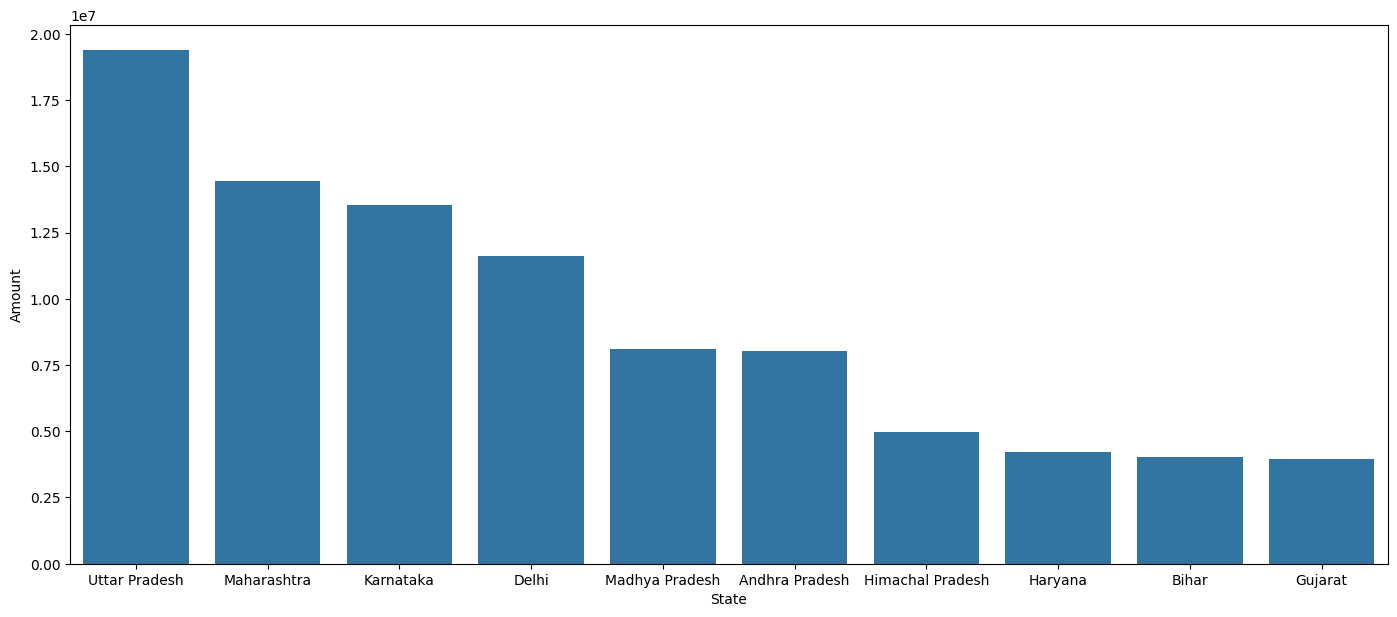

In [81]:
plt.figure(figsize=(17,7))
sns.barplot(x='State',y='Amount',data=sales_state)
plt.show()

From above graphs we can see that total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

In [36]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


# Occupation

In [37]:
df['Occupation'].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'Media', 'Banking', 'Retail',
       'IT Sector', 'Aviation', 'Hospitality', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

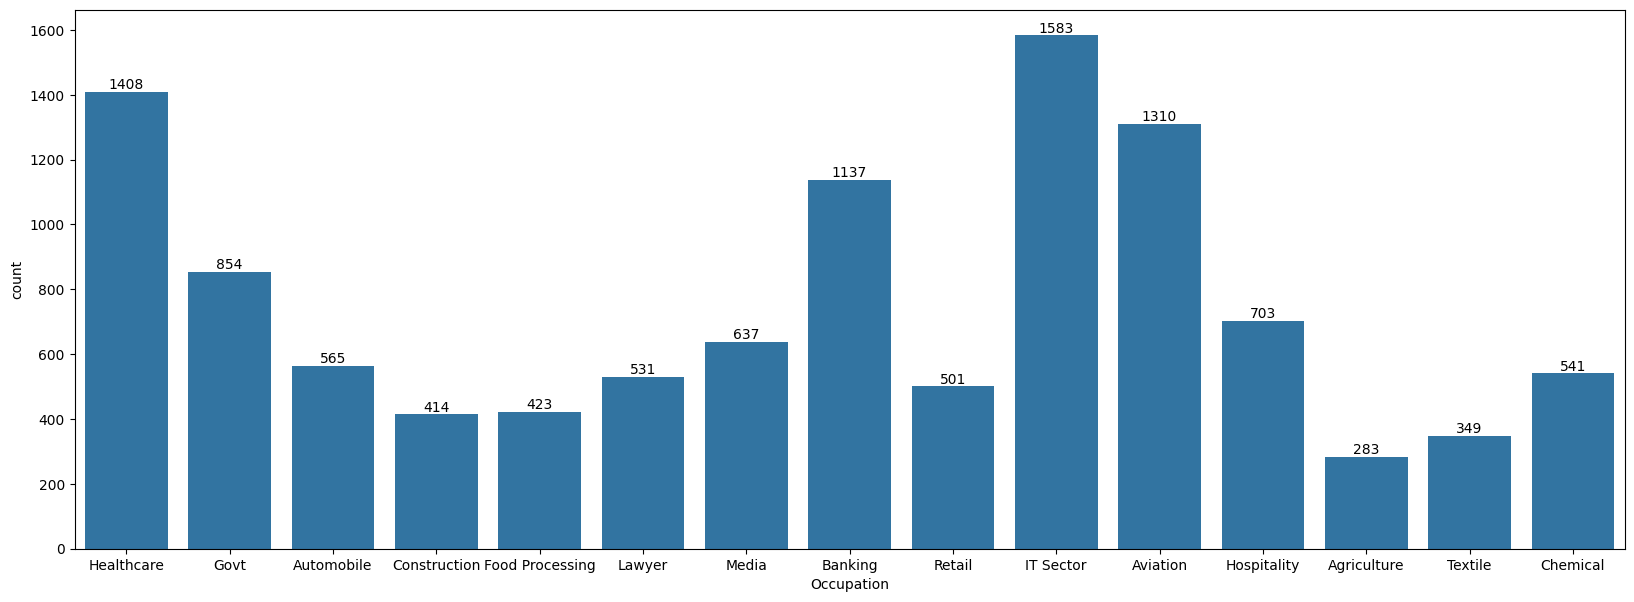

In [82]:
plt.figure(figsize=(20,7))
ax = sns.countplot(x='Occupation', data=df )
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Sum of Amount by Occupation

In [39]:
sales_Occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [40]:
sales_Occupation

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


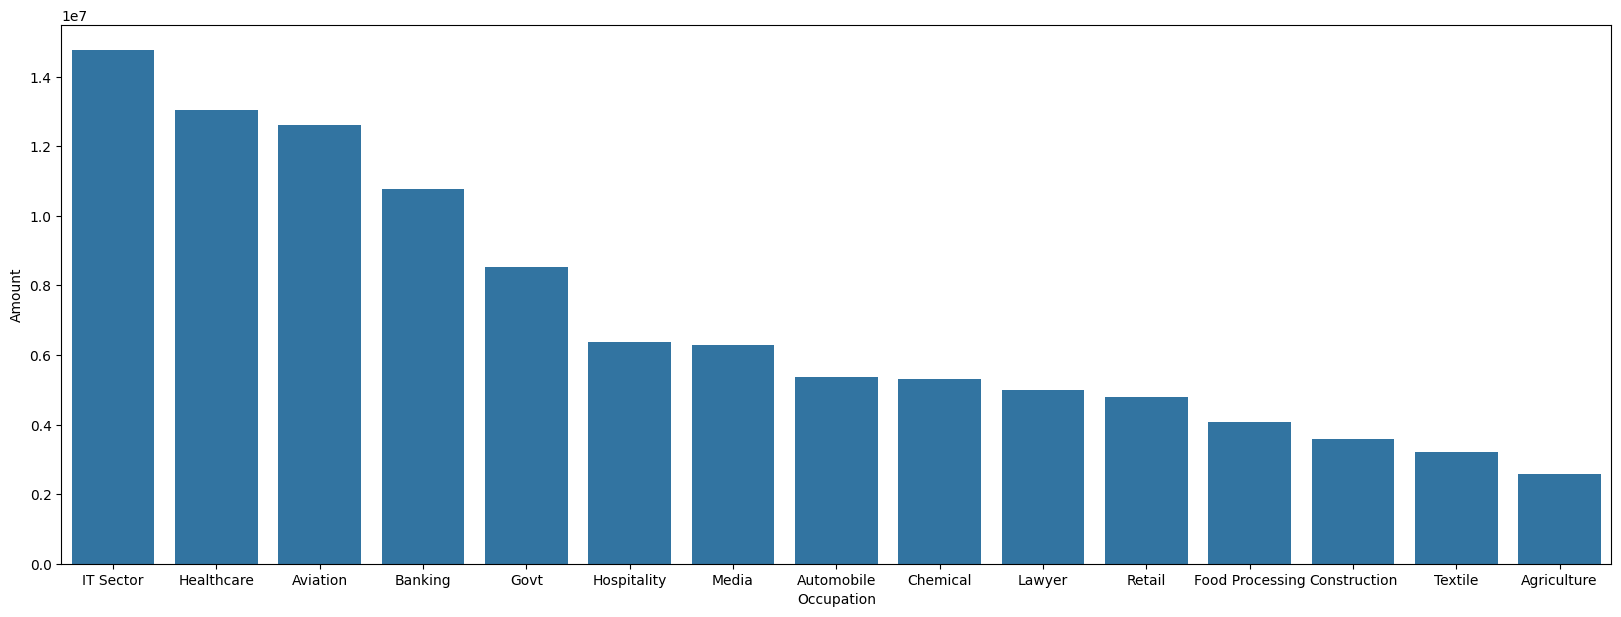

In [41]:
plt.figure(figsize=(20,7))
sns.barplot(x='Occupation', y='Amount', data=sales_Occupation)
plt.show()

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

# Sum of Order by Occupation

In [42]:
sales_Orders1 = df.groupby(['Occupation'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

In [43]:
sales_Orders1

,Occupation,Orders
10,IT Sector,3997
8,Healthcare,3455
2,Aviation,3215
3,Banking,2817
7,Govt,2155
9,Hospitality,1739
12,Media,1596
1,Automobile,1371
11,Lawyer,1344
4,Chemical,1309


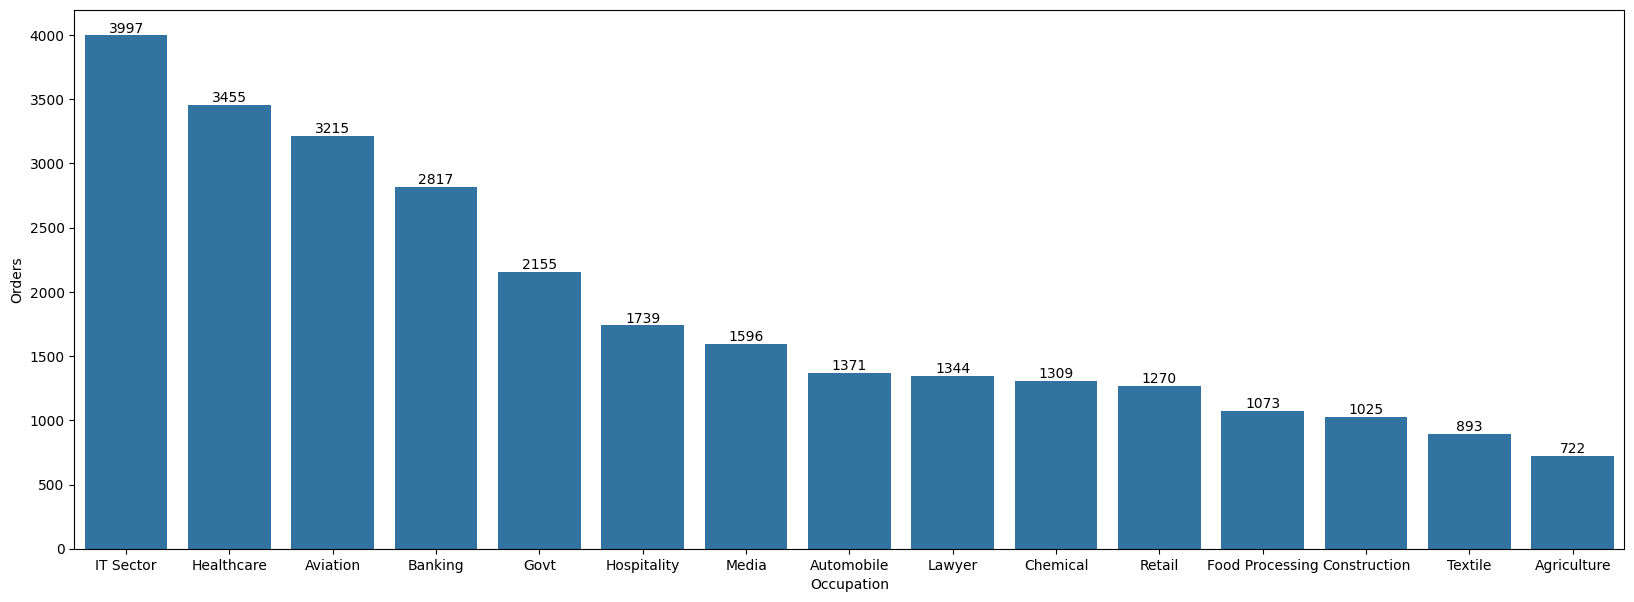

In [44]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x='Occupation', y='Orders', data=sales_Orders1)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

From above graphs we can see most of the orders are from IT Sector, Healthcare , Aviation, Banking and Govt

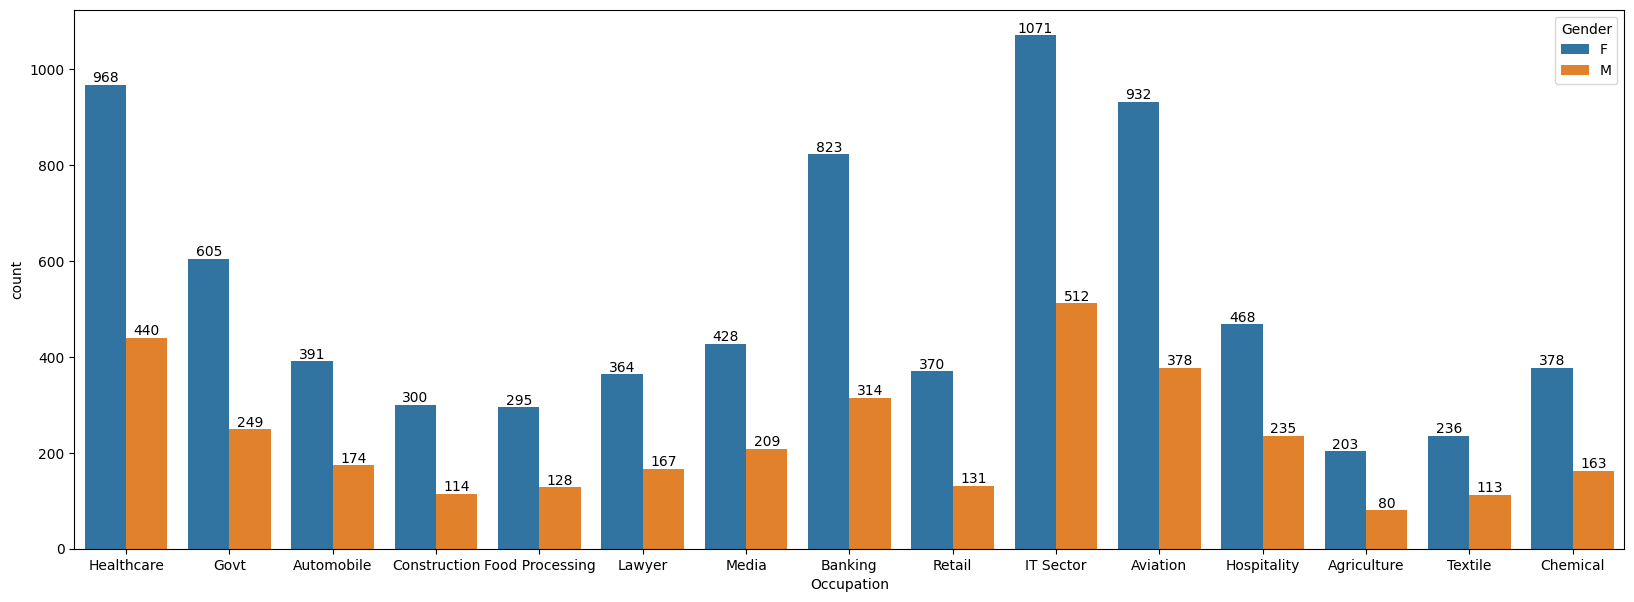

In [45]:
plt.figure(figsize=(20,7))
ax = sns.countplot(x='Occupation', hue='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Each occupation sector female is more than male

# Marital Status

In [46]:
df['Marital_Status'].value_counts()

Marital_Status
0    6518
1    4721
Name: count, dtype: int64

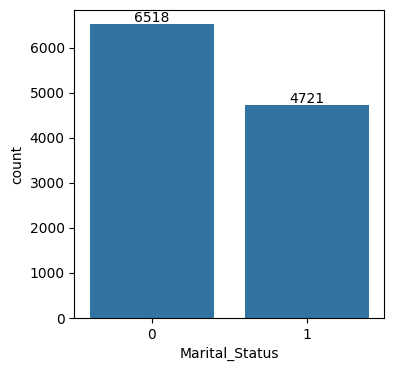

In [47]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x= 'Marital_Status', data=df,)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [48]:
Marital_status1= df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [49]:
Marital_status1

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


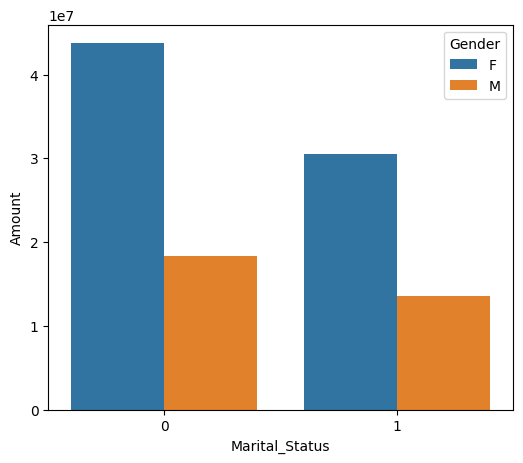

In [83]:
plt.figure(figsize=(6,5))
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data= Marital_status1)
plt.show()

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

In [51]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


# Product Category

In [52]:
df['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

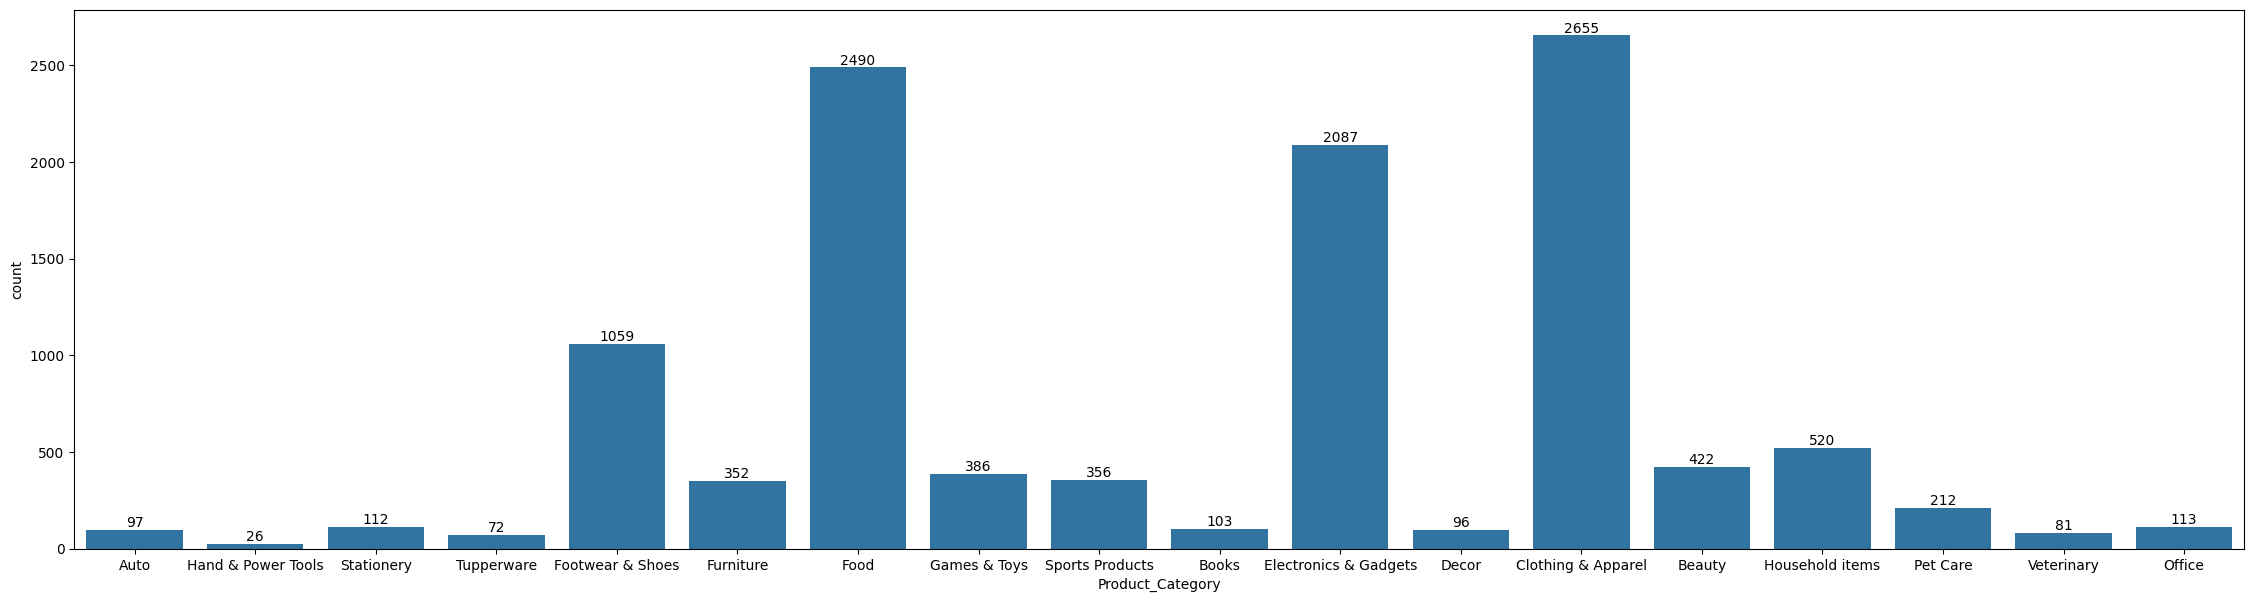

In [53]:
plt.figure(figsize=(28,7))
ax = sns.countplot(x='Product_Category', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [54]:
sales_amount = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

In [55]:
sales_amount

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


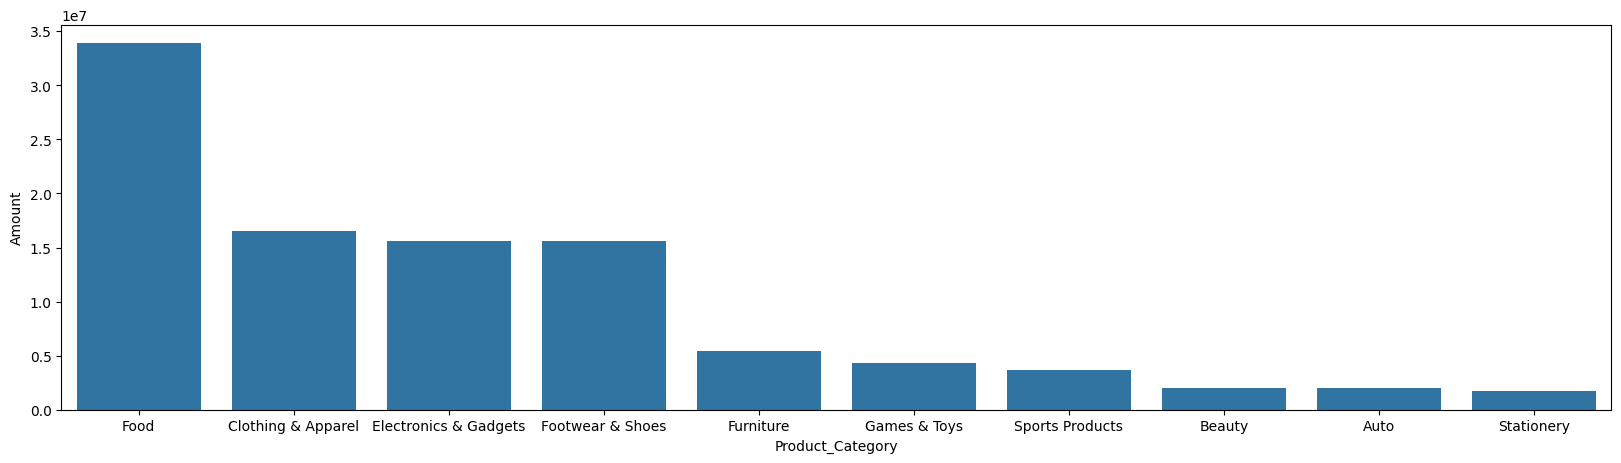

In [84]:
plt.figure(figsize=(20,5))
sns.barplot(x='Product_Category', y='Amount', data=sales_amount)
plt.show()

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

In [57]:
sales_order = df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

In [58]:
sales_order

,Product_Category,Orders
3,Clothing & Apparel,6634
6,Food,6110
5,Electronics & Gadgets,5226
7,Footwear & Shoes,2646
11,Household items,1331
1,Beauty,1086
9,Games & Toys,940
8,Furniture,889
14,Sports Products,870
13,Pet Care,536


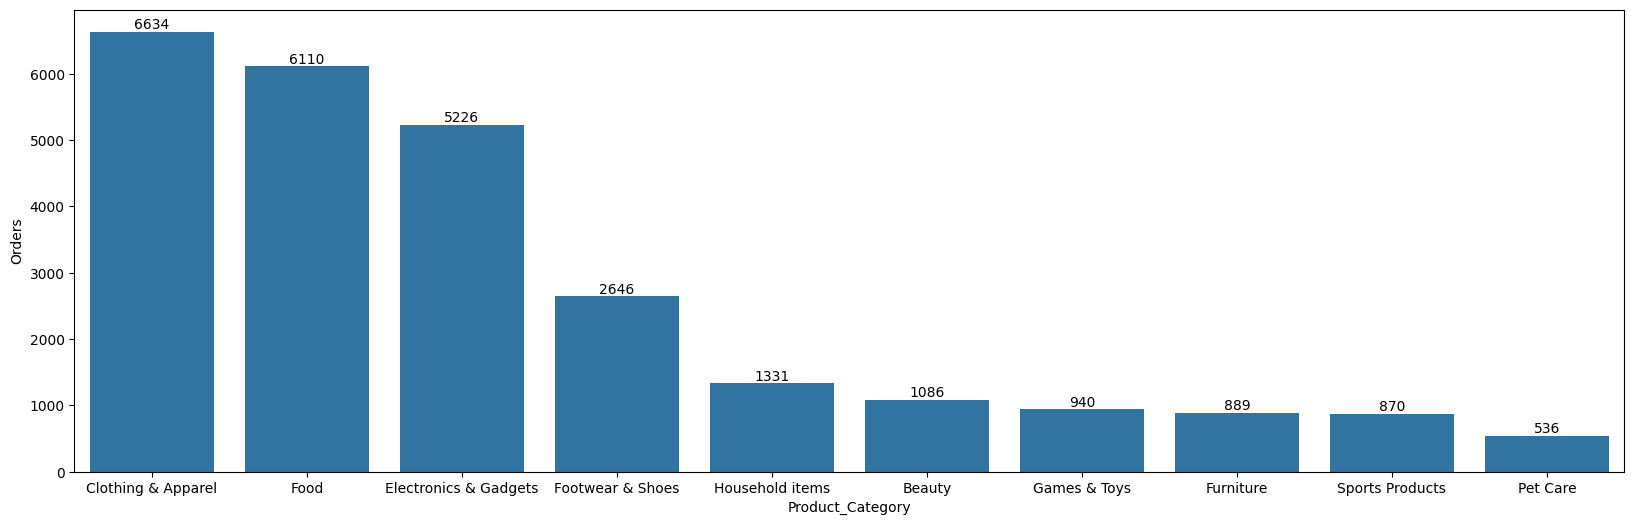

In [59]:
plt.figure(figsize=(20,6))
ax = sns.barplot(x='Product_Category', y='Orders', data=sales_order)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [ ]:
From above graphs we can see that most orders are from Clothing, Food and Electronics 

In [60]:
df['Product_ID'].nunique()

2350

In [61]:
sales_product = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

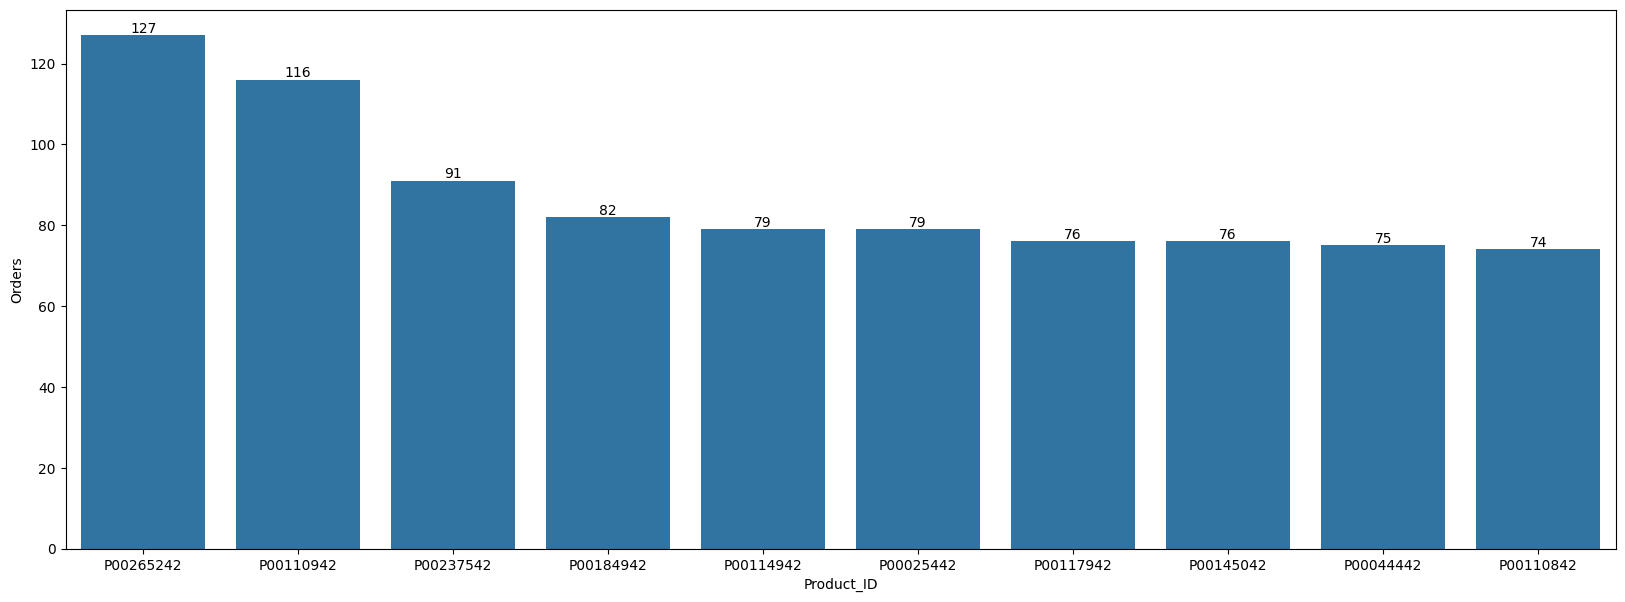

In [62]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x='Product_ID', y='Orders', data= sales_product)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#

# Conclusion

# Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, 
# Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category